# Determing the uncertainty of experimental results
## 1.1 Introduction
Due to the fact that each measurement we make has an inherent uncertainty asscoaited with it, the end result (the quantity we want to measure), also has an attributed uncertainty with it. As a result, we must express our end result with said uncertatinty. For example:

$$v_{s} = \overline{v} \pm \sigma_{v}   \space\space\space  (1.1)$$

where, $\overline{v}$ is the mean measurement value, and $ \sigma_{v} $, is the uncertainty in the measurement.

In this tutorial, we will go over how to calculate the uncertainty of the asscoiated with a measurement as calculated through a form of analysis known as ***linear regression.***

Let's assume you have made $n$ measurements, $(x_{1}, y_{1}), (x_{2}, y_{2}), ... (x_{n}, y_{n})$. Additionally, let's assume that most of the error comes from the measurement of $y_{i}$. Furthermore, the measurements are presumed to have a linear relationship, meaning:

$$y = mx + b \space\space\space  (1.2)$$

Conducting a linear regression will allows us to minimize the distance of the points to a line and find the values of $m$ and $b$, that does so. In other words, we have minimized the following equation:

$$\sum_{i=1}^n (y_{i}-mx_{i}-b)^2 \space\space\space  (1.3)$$

This method is known as the *least squares* fitting method and the resulting fit parameters can be shown to be,

$$\hat{m} = \frac{N\sum{xy}-\sum{x}\sum{y}}{N\sum{x^2}-(\sum{x})^2} \space\space\space  (1.4)$$ 

and 

$$\hat{b} = \frac{N\sum{x^2}\sum{y}-\sum{x}\sum{y}}{N\sum{x^2}-(\sum{x})^2} \space\space\space  (1.5)$$.

Additionally, the uncerstaitnty related to each measurement in y is $\sigma_{y}$, we now calculate the uncertainty associated with the best fit parameters to be,

$$\sigma_{m} = \sigma_{y}\sqrt{\frac{N}{N\sum{x^2}-(\sum{x})^2}} \space\space\space  (1.6)$$ 

and

$$\sigma_{b} = \sigma_{y}\sqrt{\frac{N}{N\sum{x^2}-(\sum{x})^2}} \space\space\space  (1.7)$$

Therefore, the correct way to represent the measured values is,

$$m = \hat{m} \pm\sigma_{m} \space\space\space  (1.8)$$
$$b = \hat{b} \pm\sigma_{b} \space\space\space  (1.9)$$

## 1.2 Example of Linear Regression and Uncertainty

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Let's assume you are trying the calculate linear relation between voltage and current and verify Ohm's law for an unknown resistor value. You have made 3 current readings at 3 different voltages for a total of 9 measurements. 

The units of measurement are [A] and [V], for current and voltage, respectively. Additionally, you Ammeter has relatively high uncerstaitnty with 0.1 mA uncertainty. Conversely, you Voltmeter has extrememly low uncertaitnty with 0.1 $\mu$V uncertainty and we can reliable set out voltage to be at a specific voltage. This means that we will solely rely on the uncertainty of the current measurements as the main source of our overall uncertainty.

Namely, we are trying to calculate what the best fit line of the form:

$$ I = \frac{V}{R} $$

where $\frac{1}{R}$ is the slope of the line and the inverse of the resistance of the unkown resistor.

In [ ]:
currents1 = np.array([-0.03, 0.03, 0.01])
currents2 = np.array([0.56, 0.52, 0.54])
currents3 = np.array([1.08, 1.1, 1.05])

current_totals = np.concatenate((currents1, currents2, currents3))

print(current_totals)


voltages1 = np.array([0.0, 0.0, 0.0])
voltages2 = np.array([1.0, 1.0, 1.0])
voltages3 = np.array([2.0, 2.0, 2.0])

voltage_totals = np.concatenate((voltages1, voltages2, voltages3))

print(voltage_totals)

[-0.03  0.03  0.01  0.56  0.52  0.54  1.08  1.1   1.05]
[0. 0. 0. 1. 1. 1. 2. 2. 2.]


Let's beging by plotting our data as a set of means at specific voltages and with error bars.

Text(0, 0.5, 'Current [A]')

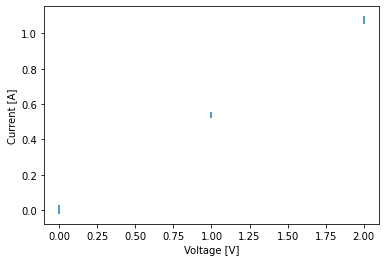

In [ ]:
mean_currents = np.array((np.mean(currents1), np.mean(currents2), np.mean(currents3)))
std_currents = np.array((np.std(currents1), np.std(currents2), np.std(currents3)))
mean_voltages = np.array([0.0, 1.0, 2.0])


plt.errorbar(mean_voltages, mean_currents, yerr = std_currents, ls = 'none')
plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')

Now, let's calculate what the values of slope and the intercept of the line that minimize the least squares function. Thankfully, Python, NumPy, has a built in function that calculates these values for you. 

In [ ]:
fit1, cov1 = np.polyfit(voltage_totals, current_totals, 1, cov='true')

Let's now plot the fitted function with the overall data set averages with error bars.

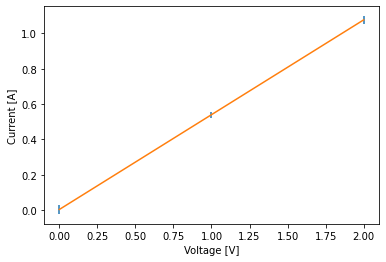

In [ ]:
plt.errorbar(mean_voltages, mean_currents, yerr = std_currents, ls = 'none')
plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')

current_fit = fit1[0]*mean_voltages + fit1[1]

plt.plot(mean_voltages, current_fit)

Lastly, let's calculate what the error associated with the slope of the line is. Applying equation 1.6, we can calculate the error.

In [ ]:
sigma_y = 0.1
n = 9

sigma_m =sigma_y*np.sqrt(n/(n*np.sum(np.square(voltage_totals))-np.square(np.sum(voltage_totals))))
print(sigma_m)

0.040824829046386304


Before proceeding, we must realize that what we have calculated is the error associated with the slope, however, our goal was to retrieve the unknown resistor value. We must then rearrange our error. Simply error propagation rules, shown here 

[Error Propapgation Rules](https://colab.research.google.com/drive/1SknuzpZHvETdLI3kCmFMmrbk8nLpRf-6?usp=sharing)

show how find the error of the inverse relation. 

$$\sigma_{R} = |R|\frac{\sigma_{m}}{m}$$ 

where,

$$R = \frac{1}{m}$$

Therefore, 

$$\sigma_{R} = \frac{\sigma_{m}}{m^2}$$ 

In [ ]:
sigma_R = sigma_m/(fit1[0]**2)

print("Resistance = " "{:.2f}".format(1/fit1[0])+ u"\u00B1" + "{:.2f}".format(sigma_R) + u"\u03A9")

Resistance = 1.86±0.14Ω


*created by Javier Carmona 07/2022*
References:

[1] Old Physics 4BL Lab Manuals - https://demoweb.physics.ucla.edu/sites/default/files/Manual4BL.pdf

[2] Chapter 8 of Taylor: An Introduction to Error Analysis